In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("eval_ckpt2150.csv")
df

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15
0,0,-0.001141,-0.000014,0.079507,0.078277,-0.247043,0.007618,4.781043,-0.218882,-0.002835,...,-0.834340,-0.095389,-2.188818,-0.028350,-0.903350,-0.291147,0.478104,0.637707,0.770279,0.0
1,1,-0.003293,-0.000045,0.078163,0.079316,-0.296378,0.005857,4.638861,-0.211403,-0.003262,...,-0.801564,-0.090621,-2.114029,-0.032616,-1.747647,-0.278085,0.463886,0.637707,0.770279,0.0
2,2,-0.005360,-0.000079,0.075962,0.079900,-0.343664,0.004255,4.503260,-0.202174,-0.003646,...,-0.766773,-0.085473,-2.021739,-0.036461,-2.613792,-0.264850,0.450326,0.637707,0.770279,0.0
3,3,-0.007328,-0.000118,0.072885,0.080104,-0.388798,0.002801,4.374289,-0.191695,-0.003976,...,-0.730632,-0.080132,-1.916948,-0.039761,-3.500764,-0.251583,0.437429,0.637707,0.770279,0.0
4,4,-0.009208,-0.000162,0.068982,0.080027,-0.431736,0.001456,4.251235,-0.222374,-0.009825,...,-0.698370,-0.083015,-2.223738,-0.098250,-2.966422,-0.266091,0.425124,0.637707,0.770279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2.128794,-0.327366,0.056242,-1.464503,-1.456987,2.095921,-11.240362,0.421876,-0.076954,...,1.137373,-0.219118,4.218762,-0.769540,1.483853,-0.396716,-1.124036,0.815922,0.578162,0.0
1996,1996,2.132905,-0.327864,0.057799,-1.044333,-1.434970,2.501868,-11.381848,0.398101,-0.025170,...,0.683475,0.043284,3.981009,-0.251700,1.605427,-0.178728,-1.138185,0.815922,0.578162,0.0
1997,1997,2.136666,-0.327877,0.059422,-0.830830,-1.427958,2.699496,-11.413871,0.355204,0.019024,...,0.212125,0.292137,3.552039,0.190238,1.637486,0.039627,-1.141387,0.815922,0.578162,0.0
1998,1998,2.140029,-0.327484,0.061095,-0.690526,-1.446686,2.821451,-11.337123,0.323806,0.057127,...,-0.270950,0.510947,3.238060,0.571272,1.725798,0.256710,-1.133712,0.815922,0.578162,0.0


In [2]:
cmd = np.array([df['obs13'], df['obs14']]).T
linvel = np.array([df['vel0'], df['vel1']]).T
# /*************  ✨ Codeium Command ⭐  *************/
df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
df['alignedvel']

0      -0.141766
1      -0.137325
2      -0.131736
3      -0.125308
4      -0.149377
          ...   
1995    0.299726
1996    0.310267
1997    0.300818
1998    0.297229
1999    0.304582
Name: alignedvel, Length: 2000, dtype: float64

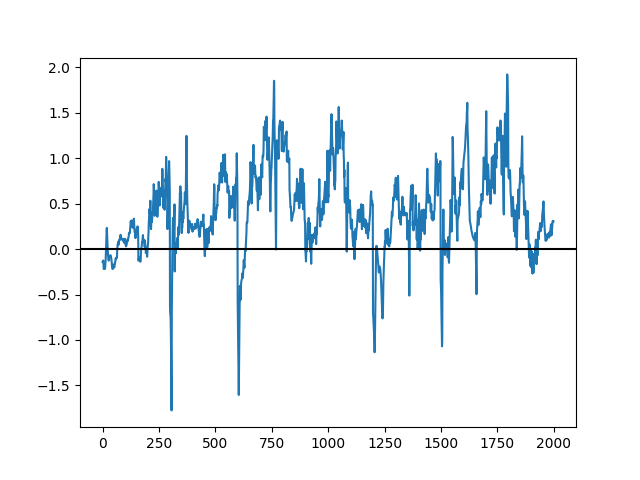

In [3]:
plt.figure()
plt.plot(df['i'], df['alignedvel'])
plt.axhline(0, color='k')


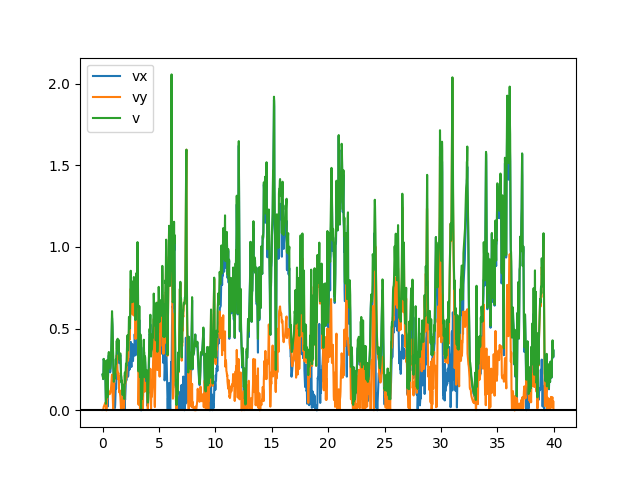

In [4]:
velnorm = np.linalg.norm(linvel, axis=1)
plt.figure()
plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
plt.plot(df['i']*2/100., velnorm, label='v')
plt.axhline(0, color='k')
plt.legend()

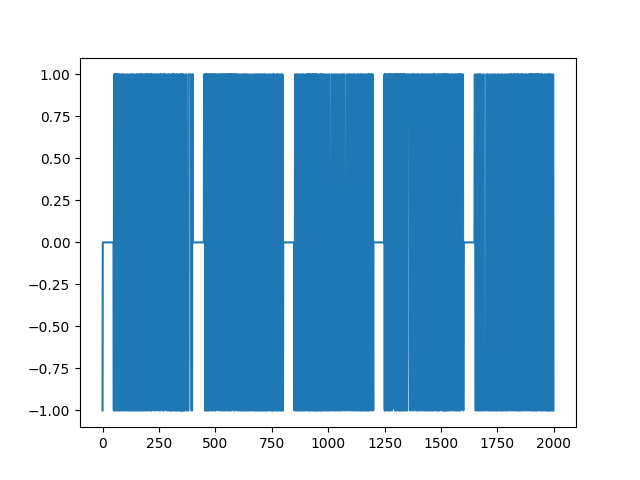

In [5]:
plt.figure()
plt.plot(df['i'], np.clip(df['action'], a_min=-1, a_max=1))